# **Qutip qubit-oscillator**

## **Import Library**

In [1]:
from qutip import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

### **Variasi $\Delta=10$**

In [3]:
# Menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 100               #jumlah n medan
use_rwa = False
g_list = np.linspace(0, 5, 101)*2*np.pi #kuat interaksi
 
# Operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi
op_p = -1j*(a - a.dag())/np.sqrt(2)
 
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())
 
 
# Hamiltonian eps/del = 0
Ho = wc * a.dag() * a     # osilator
Hq1 =  0.5*wa* (0*sx1 + 10*sz1)      #qubit
 
# Menghitung Hamiltonian
psi_list_1 = []
E_list_1 = []
for g in g_list:
    # Hamiltonian total    
    H = Ho + Hq1 + g * H1
 
    eigen_energy, eigen_state = H.groundstate() 
    psi_list_1.append(eigen_state)
    E_list_1.append(eigen_energy/(2*np.pi))
 
# Hamiltonian eps/del = 0.1
Ho = wc * a.dag() * a     # osilator
Hq2 =  0.5*wa* (1*sx1 + 10*sz1)      #qubit
 
# Menghitung Hamiltonian
psi_list_2 = []
E_list_2 = []
for g in g_list:
    # Hamiltonian total
    H2 = Ho + Hq2 + g * H1
 
    eigen_energy, eigen_state = H2.groundstate() 
    psi_list_2.append(eigen_state)
    E_list_2.append(eigen_energy/(2*np.pi))
 
# Hamiltonian eps/del = 0.5
Ho = wc * a.dag() * a     # osilator
Hq3 =  0.5*wa* (5*sx1 + 10*sz1)      #qubit
 
# Menghitung Hamiltonian
psi_list_3 = []
E_list_3 = []
for g in g_list:
    # Hamiltonian total
    H3 = Ho + Hq3 + g * H1
 
    eigen_energy, eigen_state = H3.groundstate() 
    psi_list_3.append(eigen_state)
    E_list_3.append(eigen_energy/(2*np.pi))
 
# Hamiltonian eps/del = 1
Ho = wc * a.dag() * a     # osilator
Hq4 =  0.5*wa* (10*sx1 + 10*sz1)      #qubit
 
# Menghitung Hamiltonian
psi_list_4 = []
E_list_4= []
for g in g_list:
    # Hamiltonian total
    H4 = Ho + Hq4 + g * H1
 
    eigen_energy, eigen_state = H4.groundstate() 
    psi_list_4.append(eigen_state)
    E_list_4.append(eigen_energy/(2*np.pi))

In [4]:
sp1 = 2*variance(op_p, psi_list_1)-1
sp2 = 2*variance(op_p, psi_list_2)-1
sp3 = 2*variance(op_p, psi_list_3)-1
sp4 = 2*variance(op_p, psi_list_4)-1

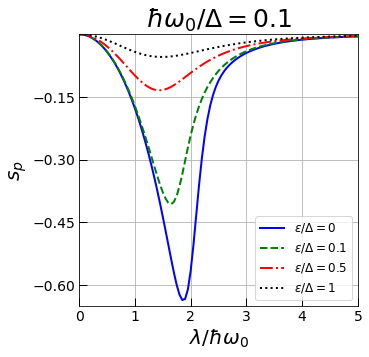

In [5]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(5, 5))
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']

axes.plot(g_list/(2*np.pi), sp1, 'blue', linewidth=2, label=r"$\epsilon/\Delta = 0$")
axes.plot(g_list/(2*np.pi), sp2, 'green', linewidth=2, linestyle='--', label=r"$\epsilon/\Delta = 0.1$")
axes.plot(g_list/(2*np.pi), sp3, 'red', linewidth=2, linestyle='dashdot', label=r"$\epsilon/\Delta = 0.5$")
axes.plot(g_list/(2*np.pi), sp4, 'black', linewidth=2, linestyle='dotted', label=r"$\epsilon/\Delta = 1$")
 
axes.set(xlim=(0, 5), ylim=(-0.65, 0))
axes.set_ylabel(r"$s_p$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.set_title(r"$\hbar\omega_0/\Delta = 0.1$", fontsize=25)

axes.set_yticks(np.arange(-0.6, 0, 0.15))
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

axes.grid()
axes.legend(loc=4, fontsize=12)

### **Variasi $\Delta=1$**

In [6]:
# Hamiltonian eps/del = 0
Ho = wc * a.dag() * a     # osilator
Hq1 =  0.5*wa* (0*sx1 + 1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_1 = []
E_list_1 = []
for g in g_list:
    # Hamiltonian total
    H = Ho + Hq1 + g * H1

    eigen_energy, eigen_state = H.groundstate() 
    psi_list_1.append(eigen_state)
    E_list_1.append(eigen_energy/(2*np.pi))

# Hamiltonian eps/del = 0.1
Ho = wc * a.dag() * a     # osilator
Hq2 =  0.5*wa* (0.1*sx1 + 1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_2 = []
E_list_2 = []
for g in g_list:
    # Hamiltonian total
    H2 = Ho + Hq2 + g * H1

    eigen_energy, eigen_state = H2.groundstate() 
    psi_list_2.append(eigen_state)
    E_list_2.append(eigen_energy/(2*np.pi))

# Hamiltonian eps/del = 0.5
Ho = wc * a.dag() * a     # osilator
Hq3 =  0.5*wa* (0.5*sx1 + 1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_3 = []
E_list_3 = []
for g in g_list:
    # Hamiltonian total
    H3 = Ho + Hq3 + g * H1

    eigen_energy, eigen_state = H3.groundstate() 
    psi_list_3.append(eigen_state)
    E_list_3.append(eigen_energy/(2*np.pi))

# Hamiltonian eps/del = 1
Ho = wc * a.dag() * a     # osilator
Hq4 =  0.5*wa* (1*sx1 + 1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_4 = []
E_list_4= []
for g in g_list:
    # Hamiltonian total
    H4 = Ho + Hq4 + g * H1

    eigen_energy, eigen_state = H4.groundstate() 
    psi_list_4.append(eigen_state)
    E_list_4.append(eigen_energy/(2*np.pi))

In [7]:
sp1 = 2*variance(op_p, psi_list_1)-1
sp2 = 2*variance(op_p, psi_list_2)-1
sp3 = 2*variance(op_p, psi_list_3)-1
sp4 = 2*variance(op_p, psi_list_4)-1

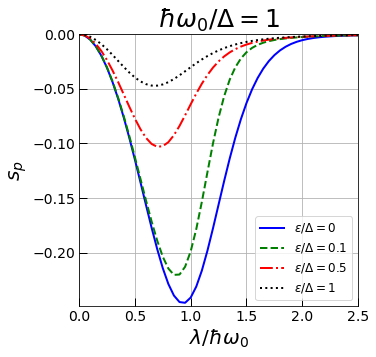

In [8]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(5,5))
 
axes.plot(g_list/(2*np.pi), sp1, 'blue', linewidth=2, label=r"$\epsilon/\Delta = 0$")
axes.plot(g_list/(2*np.pi), sp2, 'green', linewidth=2, linestyle='--', label=r"$\epsilon/\Delta = 0.1$")
axes.plot(g_list/(2*np.pi), sp3, 'red', linewidth=2, linestyle='dashdot', label=r"$\epsilon/\Delta = 0.5$")
axes.plot(g_list/(2*np.pi), sp4, 'black', linewidth=2, linestyle='dotted', label=r"$\epsilon/\Delta = 1$")
 
axes.set(xlim=(0, 2.5), ylim=(-0.249, 0))
axes.set_ylabel(r"$s_p$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.set_title(r"$\hbar\omega_0/\Delta = 1$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

axes.grid()
axes.legend(loc=4, fontsize=12)

### **Variasi $\Delta=0.1$**

In [9]:
# Hamiltonian eps/del = 0
Ho = wc * a.dag() * a     # osilator
Hq1 =  0.5*wa* (0*sx1 + 0.1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_1 = []
E_list_1 = []
for g in g_list:
    # Hamiltonian total
    H = Ho + Hq1 + g * H1

    eigen_energy, eigen_state = H.groundstate() 
    psi_list_1.append(eigen_state)
    E_list_1.append(eigen_energy/(2*np.pi))

# Hamiltonian eps/del = 0.1
Ho = wc * a.dag() * a     # osilator
Hq2 =  0.5*wa* (0.01*sx1 + 0.1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_2 = []
E_list_2 = []
for g in g_list:
    # Hamiltonian total
    H2 = Ho + Hq2 + g * H1

    eigen_energy, eigen_state = H2.groundstate() 
    psi_list_2.append(eigen_state)
    E_list_2.append(eigen_energy/(2*np.pi))

# Hamiltonian eps/del = 0.5
Ho = wc * a.dag() * a     # osilator
Hq3 =  0.5*wa* (0.05*sx1 + 0.1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_3 = []
E_list_3 = []
for g in g_list:
    # Hamiltonian total
    H3 = Ho + Hq3 + g * H1

    eigen_energy, eigen_state = H3.groundstate() 
    psi_list_3.append(eigen_state)
    E_list_3.append(eigen_energy/(2*np.pi))

# Hamiltonian eps/del = 1
Ho = wc * a.dag() * a     # osilator
Hq4 =  0.5*wa* (0.1*sx1 + 0.1*sz1)      #qubit

# Menghitung Hamiltonian
psi_list_4 = []
E_list_4= []
for g in g_list:
    # Hamiltonian total
    H4 = Ho + Hq4 + g * H1

    eigen_energy, eigen_state = H4.groundstate() 
    psi_list_4.append(eigen_state)
    E_list_4.append(eigen_energy/(2*np.pi))

In [10]:
sp1 = 2*variance(op_p, psi_list_1)-1
sp2 = 2*variance(op_p, psi_list_2)-1
sp3 = 2*variance(op_p, psi_list_3)-1
sp4 = 2*variance(op_p, psi_list_4)-1

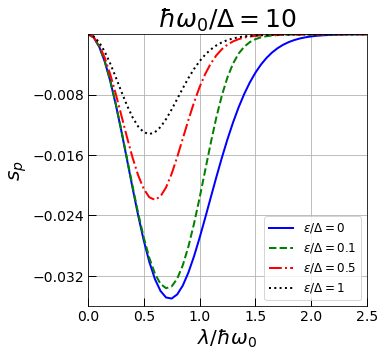

In [11]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(5, 5))
 
axes.plot(g_list/(2*np.pi), sp1, 'blue', linewidth=2, label=r"$\epsilon/\Delta = 0$")
axes.plot(g_list/(2*np.pi), sp2, 'green', linewidth=2, linestyle='--', label=r"$\epsilon/\Delta = 0.1$")
axes.plot(g_list/(2*np.pi), sp3, 'red', linewidth=2, linestyle='dashdot', label=r"$\epsilon/\Delta = 0.5$")
axes.plot(g_list/(2*np.pi), sp4, 'black', linewidth=2, linestyle='dotted', label=r"$\epsilon/\Delta = 1$")

axes.set_yticks(np.arange(-0.04, 0, 0.008))
axes.set(xlim=(0, 2.5), ylim=(-0.036, 0))
axes.set_ylabel(r"$s_p$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.set_title(r"$\hbar\omega_0/\Delta = 10$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

axes.grid()
axes.legend(loc=4, fontsize=12)